In [6]:
from fastai.text.all import *
from pathlib import Path

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

In [7]:
torch.__version__

'1.13.1+cu117'

In [8]:
torch.cuda.is_available()

True

In [10]:
path_top21 =  Path('../data/train21_shuffled.csv')
df = pd.read_csv(path_top21)

,season,episode,scene,line_text,speaker,deleted
0,7,24,8,[conducting interview] Your paper experience is very interesting. Do you think you could use that experience to inform decisions here?,Jim,False
1,9,10,27,I'm not gonna lie. Lye!,Dwight,False
2,9,9,27,Take a bowl and pass it down.,Dwight,False
3,3,15,25,It's a miracle.,Dwight,False
4,7,1,1,This is how you build a business. This is how you make it in this country.,Ryan,False
...,...,...,...,...,...,...
44370,3,5,41,I don't know. It felt far.,Pam,False
44371,3,10,43,"Excuse me [tries to take away meat with chopsticks] Ah, un guard. [Fights with chopsticks and laughs] Family style.",Michael,False
44372,5,23,19,I never went to Thailand.,Ryan,False
44373,3,4,1,"[breathless] All right. Okay. [goes back down pretend stairs, crawls on belly to the kitchen for the coffee]",Michael,False


In [11]:
df_reduced = df.iloc[:15000]

,season,episode,scene,line_text,speaker,deleted
0,7,24,8,[conducting interview] Your paper experience is very interesting. Do you think you could use that experience to inform decisions here?,Jim,False
1,9,10,27,I'm not gonna lie. Lye!,Dwight,False
2,9,9,27,Take a bowl and pass it down.,Dwight,False
3,3,15,25,It's a miracle.,Dwight,False
4,7,1,1,This is how you build a business. This is how you make it in this country.,Ryan,False
...,...,...,...,...,...,...
14995,4,3,9,Waste of time. The website's going to win.,Angela,False
14996,7,23,1,"No, you can't get flowers for someone who's in a coma. They'll wilt before he wakes up.",Dwight,False
14997,5,24,30,Challenge.,Creed,False
14998,6,17,17,Are you serious?,Darryl,False


<Axes: >

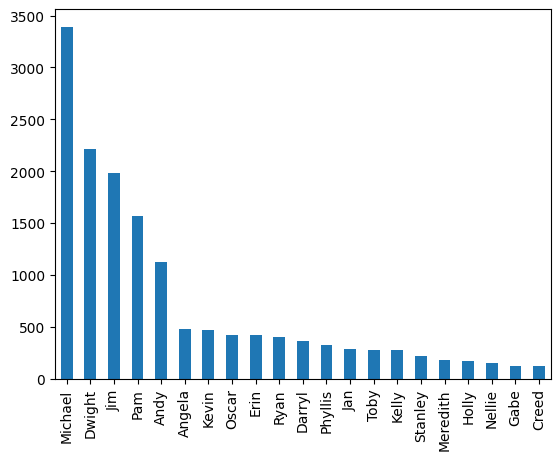

In [12]:
df_reduced['speaker'].value_counts().plot(kind='bar')

In [13]:
max_dialog = df_reduced['speaker'].value_counts().max()

3392

In [14]:
import random

dfs_oversampled = [df_reduced]
for _, group in df_reduced.groupby('speaker'):
    rand_mult = random.uniform(0.85, 1.15)
    sample_amt_to_max = max_dialog - len(group)
    dfs_oversampled.append(group.sample(int(sample_amt_to_max * rand_mult), replace=True))
df_reduced = pd.concat(dfs_oversampled)

,season,episode,scene,line_text,speaker,deleted
0,7,24,8,[conducting interview] Your paper experience is very interesting. Do you think you could use that experience to inform decisions here?,Jim,False
1,9,10,27,I'm not gonna lie. Lye!,Dwight,False
2,9,9,27,Take a bowl and pass it down.,Dwight,False
3,3,15,25,It's a miracle.,Dwight,False
4,7,1,1,This is how you build a business. This is how you make it in this country.,Ryan,False
...,...,...,...,...,...,...
922,6,6,10,What did I do?,Toby,False
10015,6,24,17,Write your own damn novel.,Toby,False
4263,8,17,11,Me?,Toby,False
5136,7,11,15,"Yeah, uh, she'll be starting next week. If you have any questions about the transition, just let me know.",Toby,False


<Axes: >

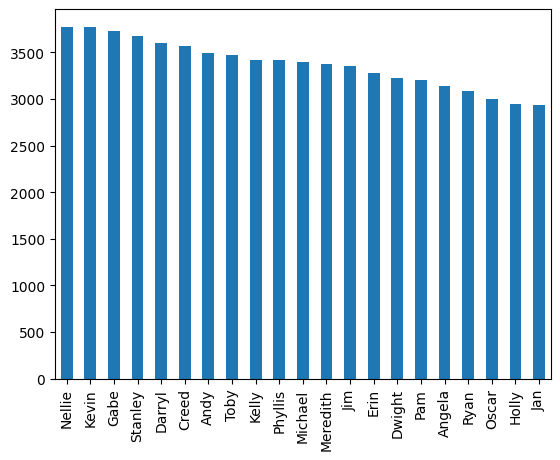

In [15]:
df_reduced['speaker'].value_counts().plot(kind='bar')

In [16]:
dls = TextDataLoaders.from_df(df_reduced, text_col='line_text', label_col='speaker', shuffle_train=True)
dls.show_batch()

,text,category
0,"xxbos xxmaj i 've really learned from the xxunk . xxmaj the great xxunk , xxmaj drew xxmaj xxunk , xxmaj ryan xxmaj xxunk , uh , the xxmaj xxunk guy not so much . xxmaj he 's more the signing , xxmaj wayne xxmaj xxunk . xxmaj um , xxmaj robin xxmaj williams . xxmaj oh , man , would i love to go head - to - head with him . xxmaj oh ! xxmaj that would be exciting . [ as xxmaj robin xxmaj williams ] ' hi . xxmaj i 'm xxmaj xxunk from xxmaj xxunk . ' xxmaj well , xxmaj i 'm xxmaj xxunk from xxmaj xxunk . xxmaj xxunk , xxunk . xxmaj xxunk , xxunk . [ as xxmaj robin xxmaj williams ] ' that 's xxmaj good morning , xxmaj xxunk ! ' xxmaj well , hello to you . xxmaj",Michael
1,"xxbos xxmaj all these people are walking around and they 're happy and their lives are just going along , ignorance is bliss . xxmaj but if they knew what was xxunk on the other side of that xxunk that xxunk monster . [ imitating monster ] ' i 'm gon na get you , downsizing . ' xxmaj no . xxmaj they would n't … xxmaj they 'd freak . xxmaj and xxmaj i 'm not going to play xxmaj god . xxmaj they look to me for support . xxmaj and they look to me for guidance and leadership . xxmaj and i think if i could lie to them and it serves them , then that 's what xxmaj i 'm going to do .",Michael
2,"xxbos [ cats meowing in background][on nanny - cam ] xxmaj where is that bad cat ? xxmaj oh , you know who you are . xxmaj excuse me , xxmaj petals , xxmaj i 'm looking for xxmaj mr . xxmaj ash . xxmaj he 's a bad cat . xxmaj bad , bad cat . xxmaj do you hear me ? xxmaj bad . xxmaj yeah , you were bad . xxmaj no , you look at me when i talk to you . xxmaj do you hear me , xxmaj mr . xxmaj ash ? xxmaj you look at me . 'cause xxmaj i 'm talking to you right now .",Angela
3,"xxbos xxmaj hey everyone . xxmaj hi . xxmaj quite an afternoon , huh ? xxmaj cathartic in a way . xxmaj i 'm glad i got to share it with you . xxmaj it makes you think about what 's really important . [ pam hands xxmaj jim a note ] xxmaj it 's not about showing you 're in charge or flexing some sort of authority . xxmaj it 's about forgiveness . xxmaj and yes , xxmaj i 'm talking about you three in this desk clump right here . i think that , if you were to apologize to me , then i would revoke your suspension .",Gabe
4,"xxbos xxmaj hey everyone . xxmaj hi . xxmaj quite an afternoon , huh ? xxmaj cathartic in a way . xxmaj i 'm glad i got to share it with you . xxmaj it makes you think about what 's really important . [ pam hands xxmaj jim a note ] xxmaj it 's not about showing you 're in charge or flexing some sort of authority . xxmaj it 's about forgiveness . xxmaj and yes , xxmaj i 'm talking about you three in this desk clump right here . i think that , if you were to apologize to me , then i would revoke your suspension .",Gabe
5,"xxbos xxmaj hey everyone . xxmaj hi . xxmaj quite an afternoon , huh ? xxmaj cathartic in a way . xxmaj i 'm glad i got to share it with you . xxmaj it makes you think about what 's really important . [ pam hands xxmaj jim a note ] xxmaj it 's not about showing you 're in charge or flexing some sort of authority . xxmaj it 's about forgiveness . xxmaj and yes , xxmaj i 'm talking about you three in this desk clump right here . i think that , if you were to apologize to me , then i would revoke your suspension .",Gabe
6,"xxbos xxmaj or maybe there 's a xxmaj god . i do n't know . i mean , it 's just not a guy with a long white beard . [ erin looks shocked ] xxmaj or it could be . i mean , it 's possible that that is exactly what - what xxmaj god is . xxmaj but for all of the disbelief [ phone rings ] i believe in us . i believe in love . xxmaj you have made me believe that for all of the hokum [ phone continues ringing ] out … there … uh , do we not have voicemail ?",Gabe
7,"xxbos xxmaj it 's been a weird week since we found out i had to transfer . xxmaj michael wanted me to quit and get some job here in xxmaj scranton , and i said ' well , why do n't you quit and

0.01

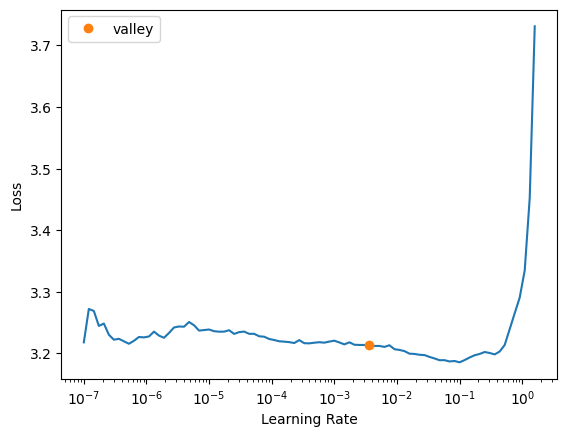

In [17]:
learner = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.75, metrics=accuracy)
learner.lr_find()
# learner.fine_tune(10, 1e-2)
suggestedLR = 1e-2

In [18]:
learner.fine_tune(25, suggestedLR)

epoch,train_loss,valid_loss,accuracy,time
0,2.997085,2.944643,0.109566,00:13


epoch,train_loss,valid_loss,accuracy,time
0,2.691037,2.478860,0.285775,00:26
1,2.244871,1.880924,0.451394,00:26
2,1.905898,1.476056,0.565549,00:26
3,1.625578,1.177383,0.646170,00:26
4,1.305157,0.967953,0.701377,00:26
5,1.152467,0.804145,0.746417,00:26
6,0.983540,0.730263,0.765196,00:26
7,0.828718,0.653462,0.789552,00:26
8,0.798782,0.614725,0.810095,00:26
9,0.666334,0.559146,0.822944,00:27


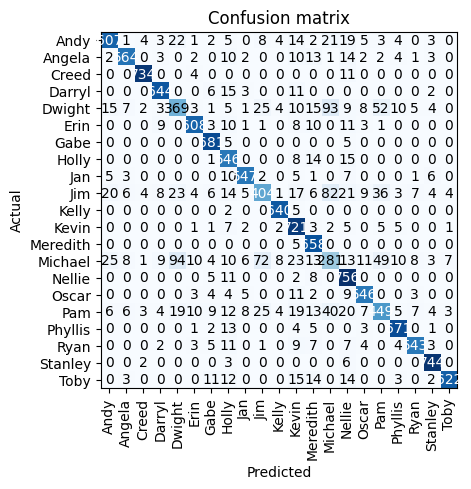

In [19]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

In [20]:
learner.fine_tune(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.342198,0.485213,0.866502,00:16


epoch,train_loss,valid_loss,accuracy,time
0,0.396766,0.457418,0.869679,00:26
1,0.466863,0.458969,0.866008,00:26
2,0.471619,0.465793,0.866573,00:26
3,0.434474,0.478354,0.866926,00:26
4,0.398038,0.473626,0.867631,00:26
5,0.353315,0.476384,0.869679,00:26
6,0.297821,0.475976,0.871161,00:26
7,0.389086,0.472698,0.872008,00:27
8,0.389309,0.477398,0.872008,00:26
9,0.233322,0.484576,0.871514,00:27


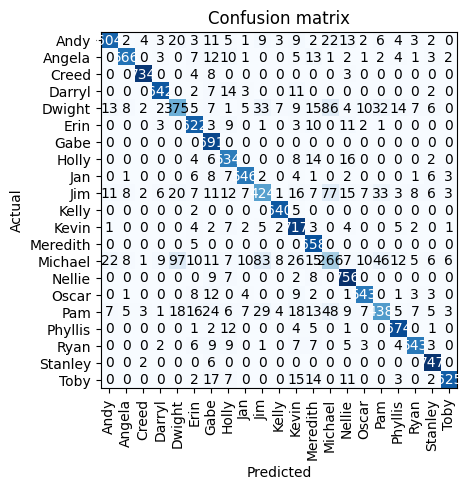

In [21]:
interp.plot_confusion_matrix()

In [22]:
dls.show_batch()

,text,category
0,"xxbos xxmaj i 've really learned from the xxunk . xxmaj the great xxunk , xxmaj drew xxmaj xxunk , xxmaj ryan xxmaj xxunk , uh , the xxmaj xxunk guy not so much . xxmaj he 's more the signing , xxmaj wayne xxmaj xxunk . xxmaj um , xxmaj robin xxmaj williams . xxmaj oh , man , would i love to go head - to - head with him . xxmaj oh ! xxmaj that would be exciting . [ as xxmaj robin xxmaj williams ] ' hi . xxmaj i 'm xxmaj xxunk from xxmaj xxunk . ' xxmaj well , xxmaj i 'm xxmaj xxunk from xxmaj xxunk . xxmaj xxunk , xxunk . xxmaj xxunk , xxunk . [ as xxmaj robin xxmaj williams ] ' that 's xxmaj good morning , xxmaj xxunk ! ' xxmaj well , hello to you . xxmaj",Michael
1,"xxbos xxmaj it 's ok . xxmaj we 're having fun . xxmaj it 's not actually the first time xxmaj i 've been embarrassed by a pond . xxmaj in high school , the girls volleyball team always used to xxunk me into the frozen lake . xxmaj four years in a row . xxmaj oh … it was freezing . [ jim signals for making to stop ] xxmaj no . xxmaj no . xxmaj no . xxmaj oh , this is even worse . [ michael begins to lose his cool ] xxmaj couple weeks ago i went to get a new xxunk and i wanted on of those packages where you have , you know , the xxunk the five- the friends and family thing and the guys was like , ' who are your 5 friends ? ' and xxmaj i 'm , like ,",Michael
2,"xxbos xxmaj tonight is the xxmaj dundies , the xxunk employee awards night here at xxmaj dunder xxmaj mifflin . [ holds up a trophy of a business man ] xxmaj and this is everybody 's favorite day . xxmaj everybody looks forward to it , because , you know , a lot of the people here do n't get trophies , very often . xxmaj like xxmaj meredith or xxmaj kevin , i mean , who 's gon na give xxmaj kevin an award ? xxmaj xxunk ' xxmaj donuts ? xxmaj plus , bonus , it 's really , really funny . xxmaj so xxup i , you know , an employee will go home , and he 'll tell his neighbor , ' hey , did you get an award ? ' xxmaj and the neighbor will say , ' no man . i mean , i",Michael
3,"xxbos i have n't heard anything , but i bet xxmaj jim got the job . i mean , why would n't he ? xxmaj he 's totally qualified , and smart , everyone loves him … and , if he never comes back again … that 's xxup ok . xxmaj we 're friends . xxmaj and xxmaj i 'm sure we 'll stay friends . xxmaj we just , we never got the timing right . xxmaj you know ? i shot him down , and then he did the same to me , and … xxmaj but you know what ? xxmaj it 's xxup ok . xxmaj i 'm totally fine . xxmaj everything is gon na be totally xxrep 3 - [ jim walks in ]",Pam
4,"xxbos i am talking about freedom , about choice . xxmaj america , i do n't think you need to worry . xxmaj because if you want to beat xxmaj china you will . xxmaj if you do n't , that 's fine . xxmaj that my friend , is your xxunk . xxmaj y'know , a lot of people say if you dig long enough and hard enough you will get to xxmaj china , and that may be the true , but what they do n't tell you is that if you dig long enough and hard enough in a conversation , you get to a friend . xxmaj so here is to conversation .",Michael
5,"xxbos i do n't demand justice often . xxmaj i 'm not like xxmaj angela , who calls a lawyer every time someone watches a youtube video of animals doing it . xxmaj but , someone should get fired over this , right ? xxmaj val 's no help . xxmaj andy 's gone . xxmaj jim 's out . i just feel like xxmaj i 'm on my own here . [ boom microphone bumps her head , she smiles ] i mean , xxup ok , not completely on my own . xxmaj but , in terms of people who can do something . xxmaj thank you , xxmaj brian .",Pam
6,"xxbos xxmaj hey everyone . xxmaj hi . xxmaj quite an afternoon , huh ? xxmaj cathartic in a way . xxmaj i 'm glad i got to share it with you . xxmaj it makes you think about what 's really important . [ pam hands xxmaj jim a note ] xxmaj it 's not about showing you 're in charge or flexing some sort of authority . xxmaj it 's about forgiveness . xxmaj and yes

In [23]:
learner.predict("dwight try to help him down")

('Jan',
 tensor(8),
 tensor([5.8442e-03, 6.1580e-03, 2.7385e-04, 1.7859e-04, 1.4361e-02, 3.9943e-03,
         2.4212e-04, 1.6268e-03, 4.2474e-01, 5.3731e-02, 4.7216e-03, 1.9260e-02,
         3.5333e-05, 1.7201e-01, 2.5708e-04, 3.3294e-04, 3.4225e-02, 2.2228e-01,
         1.2403e-05, 1.4315e-04, 3.5578e-02]))

In [24]:
learner.show_results()

,text,category,category_
0,"xxbos xxmaj look , i am not a xxunk . i ca n't … i ca n't dress like xxmaj donald xxmaj trump dresses . i have to stay within the parameters of my budget . i ca n't shop at a fancy xxmaj xxunk xxunk . i buy my xxunk the old fashioned way . i buy them from discount stores … or on ebay . xxmaj and when i found out that xxmaj xxunk was having a midnight xxunk sale , i ran , not walked , as per the instructions on the xxunk . xxmaj and i got there , and when the doors opened , all of these women ran to this one xxunk . xxmaj and i did too . xxmaj and i grabbed this suit . xxmaj and a woman , sort of a , i do n't know , xxmaj xxunk xxmaj elliot",Michael,Michael
1,"xxbos xxmaj finally . xxmaj right ? xxmaj ok , xxmaj phyllis you must be exhausted from standing on those xxunk . xxmaj why do n't you have a seat ? [ phyllis sits ] xxmaj let 's all xxunk at xxmaj phyllis . [ everyone claps ] xxmaj ok ! [ in xxmaj michael xxmaj clump voice ] xxmaj when xxmaj michael xxmaj clump wants to remind you [ normal voice ] that corporate … their idea , yes , was to xxunk you to lose weight , but more xxunk what this whole thing is about , this contest is really about being healthy . xxmaj and in order to be healthy , you have to eat , xxmaj kelly . xxmaj kelly . [ xxunk down in front of xxmaj kelly , xxmaj dwight tries to help him down , xxmaj michael shouts xxunk at him ]",Michael,Michael
2,"xxbos xxmaj hey , hey , hey , hey , hey , hey , hey , hey xxup it guy . xxmaj here 's the story , champ . xxmaj none of us have spent a lot of time getting to know you , okay ? xxmaj we liked the last guy , xxmaj xxunk , because he kept to himself , and we also thought he might have been a terrorist . xxmaj you know what , xxmaj i 'm going to leave you with one other thought . xxmaj inner city kids use computers for two things , games and porn . xxmaj so good luck wasting your life , lurch .",Dwight,Dwight
3,"xxbos xxmaj hey everyone . xxmaj hi . xxmaj quite an afternoon , huh ? xxmaj cathartic in a way . xxmaj i 'm glad i got to share it with you . xxmaj it makes you think about what 's really important . [ pam hands xxmaj jim a note ] xxmaj it 's not about showing you 're in charge or flexing some sort of authority . xxmaj it 's about forgiveness . xxmaj and yes , xxmaj i 'm talking about you three in this desk clump right here . i think that , if you were to apologize to me , then i would revoke your suspension .",Gabe,Gabe
4,"xxbos xxmaj hey everyone . xxmaj hi . xxmaj quite an afternoon , huh ? xxmaj cathartic in a way . xxmaj i 'm glad i got to share it with you . xxmaj it makes you think about what 's really important . [ pam hands xxmaj jim a note ] xxmaj it 's not about showing you 're in charge or flexing some sort of authority . xxmaj it 's about forgiveness . xxmaj and yes , xxmaj i 'm talking about you three in this desk clump right here . i think that , if you were to apologize to me , then i would revoke your suspension .",Gabe,Gabe
5,"xxbos xxmaj hey everyone . xxmaj hi . xxmaj quite an afternoon , huh ? xxmaj cathartic in a way . xxmaj i 'm glad i got to share it with you . xxmaj it makes you think about what 's really important . [ pam hands xxmaj jim a note ] xxmaj it 's not about showing you 're in charge or flexing some sort of authority . xxmaj it 's about forgiveness . xxmaj and yes , xxmaj i 'm talking about you three in this desk clump right here . i think that , if you were to apologize to me , then i would revoke your suspension .",Gabe,Gabe
6,"xxbos xxmaj hey everyone . xxmaj hi . xxmaj quite an afternoon , huh ? xxmaj cathartic in a way . xxmaj i 'm glad i got to share it with you . xxmaj it makes you think about what 's really important . [ pam hands xxmaj jim a note ] xxmaj it 's not about showing you 're in charge or flexing some sort of authority . xxmaj it 's about forgiveness . xxmaj and yes , xxmaj i 'm talking about you three in this desk clump right here . i think that , if you were to apologi

In [25]:
learner.predict("hes totally qualified, and smart, everyone loves him")

('Michael',
 tensor(13),
 tensor([2.2454e-04, 2.4613e-04, 4.6839e-05, 2.8063e-04, 9.5604e-04, 1.6492e-04,
         3.9396e-06, 1.7633e-06, 3.5561e-03, 1.9874e-02, 2.5445e-04, 1.5824e-05,
         1.7761e-06, 9.5955e-01, 7.2792e-06, 9.3409e-05, 1.2940e-02, 6.8988e-05,
         1.6365e-03, 1.6060e-05, 6.3151e-05]))

In [26]:
# learner.save('35epoch_all_lines')
# learner.export('35epoch_15000_lines')